In [ ]:
# NOTE: minepy is currently only available for Linux nad MacOS
!pip install minepy

In [36]:
import numpy as np
from scipy import stats
from sklearn.feature_selection import mutual_info_regression

from minepy import MINE

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
# Generate the data
x0 = np.arange(-9, 9.1, .06) 
y0 = (x0**2 / 70) - 1 + 0.06 * np.random.randn(x0.shape[0])

x1 = np.array([-5.5] * 50) + 0.4 * np.random.randn(50)
x2 = np.array([+5.5] * 50) + 0.4 * np.random.randn(50)

y1 = np.array([1.5] * 50) + 0.05 * np.random.randn(50)
y2 = np.array([1.5] * 50) + 0.05 * np.random.randn(50)

x = np.concatenate([x0, x1, x2])
y = np.concatenate([y0, y1, y2])

# Get correlations
rho, p = stats.pearsonr(x, y)

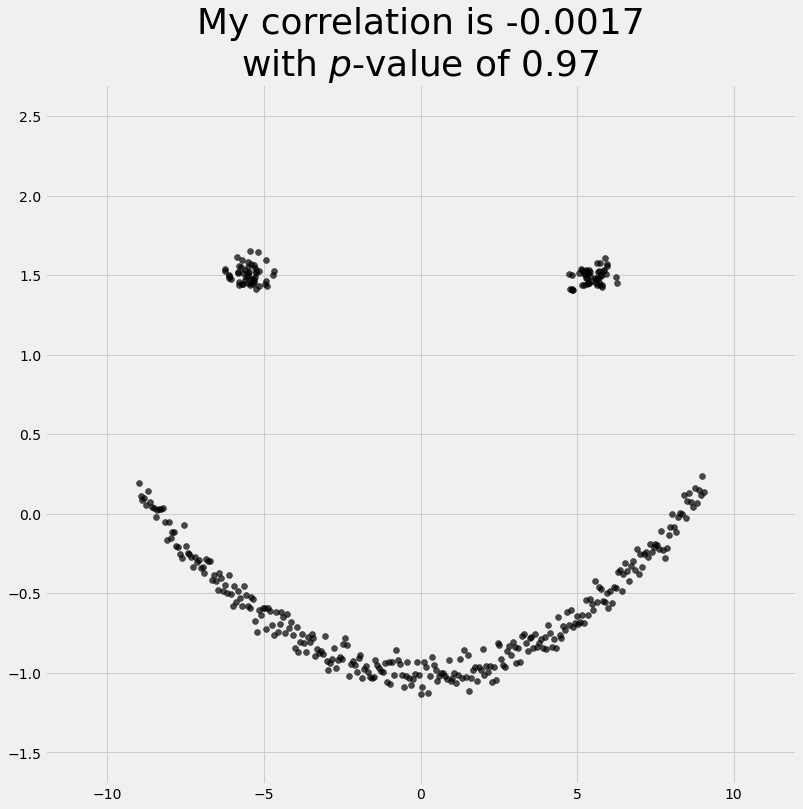

In [35]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c='black', alpha=.7)

plt.xlim(-12, 12)
plt.ylim(-1.7, 2.7)


plt.title(f'My correlation is {rho:0.4f}\nwith $p$-value of {p:0.2f}', fontsize=36)

plt.show()

In [58]:
# Pearson
pearson_r, pearson_p = stats.pearsonr(x, y)


# Spearman
spearman_r, spearman_p = stats.spearmanr(x, y)

# Kendall Tau
kendall_r, kendall_p = stats.kendalltau(x, y)

# Mutual information
mi = mutual_info_regression(x.reshape(-1, 1), y)[0]

# MIC (default params)
mine = MINE() 
mine.compute_score(x,y) 
mic = mine.mic() 

print(f'Pearson R: {pearson_r:0.4f}\np-val: {pearson_p:0.2f}\n')
print(f'Spearman R: {spearman_r:0.4f}\np-val: {spearman_p:0.2f}\n')
print(f'Kendall Tau: {kendall_r:0.4f}\np-val: {kendall_p:0.2f}\n')
print(f'Mutual information (KSG): {mi:0.4f}\np-val: --\n')
print(f'MIC: {mic:0.4f}\np-val: --')

Pearson R: -0.0017
p-val: 0.97

Spearman R: -0.0041
p-val: 0.93

Kendall Tau: -0.0078
p-val: 0.81

Mutual information (KSG): 1.5353
p-val: --

MIC: 0.8519
p-val: --
